In [ ]:
# import hal yang diperlukan
import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

## Data

Data yang diklasifikasikan adalah CIFAR10. Beberapa tahap perlu dilakukan sebelum melakukan pengolahan data ini. Persiapan yang dilakukan adalah load data, dan melakukan normalisasi pada data tersebut.

### Persiapan Data
Persiapkan data dengan load dataset dari API yang disediakan Keras. Berikutnya persiapkan data dengan melakukan normalisasi terhadap piksel citra dan label. 

In [ ]:
# load dataset
cifar10_dataset = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10_dataset.load_data()


In [ ]:
# menyimpan informasi ukuran citra untuk pengolahan nanti
(_, IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS) = x_train.shape

# Operasi reshape y_train dari 2D array --> 1D array.
y_train = y_train.reshape(-1,) 
y_test = y_test.reshape(-1,)

# Normalisasi citra
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

### Tampilkan data citra
Sebagai ilustrasi, berikut tampilan 3 data pertama pada dataset.

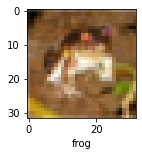

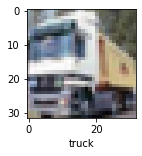

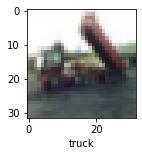

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

for i in range(3):  
  plot_sample(x_train, y_train, i)

## Buat Model CNN


Ilustrasi dari model CNN yang dibentuk adalah sebagai berikut:

![ilustrasi CNN](https://github.com/golchafun/tugas-pml-explor-cnn-nn/blob/master/gambar/Ilustrasi%20CNN.jpg?raw=true)

In [ ]:
model = models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=3,
    filters=32,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=3,
    filters=48,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=64,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

### Visualisasi model

In [ ]:
# menampilkan summary model
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 48)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 48)          0

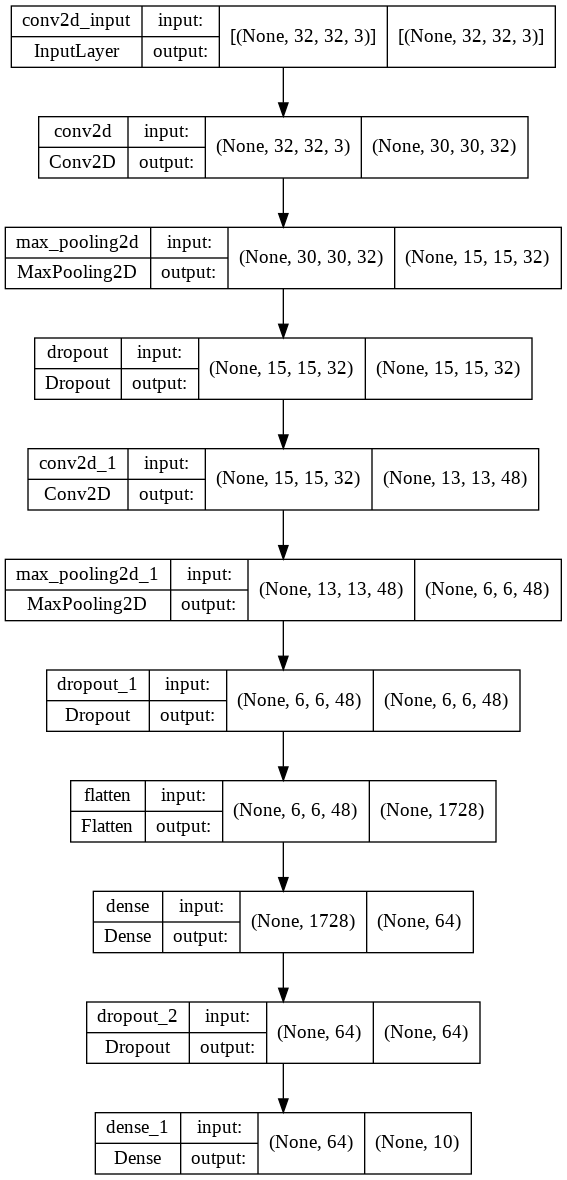

In [ ]:
# plot model dalam diagram
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [ ]:
# lakukan kompilasi (compile) model
kind_optimizer = tf.keras.optimizers.Adamax()

model.compile(
    optimizer=kind_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

### Lakukan training

In [ ]:
# model.fit(x_train_normalized, y_train, epochs=40, verbose=0)
training_history = model.fit(
    x_train_normalized, 
    y_train, 
    epochs=40, 
    validation_data=(x_test_normalized, y_test)
)

Epoch 1/40
1563/1563 [==============================] - 69s 44ms/step - loss: 0.6838 - accuracy: 0.7577 - val_loss: 0.7932 - val_accuracy: 0.7293
Epoch 2/40
1563/1563 [==============================] - 66s 43ms/step - loss: 0.6812 - accuracy: 0.7593 - val_loss: 0.7822 - val_accuracy: 0.7299
Epoch 3/40
1563/1563 [==============================] - 66s 42ms/step - loss: 0.6703 - accuracy: 0.7620 - val_loss: 0.7803 - val_accuracy: 0.7322
Epoch 4/40
1563/1563 [==============================] - 67s 43ms/step - loss: 0.6691 - accuracy: 0.7618 - val_loss: 0.7888 - val_accuracy: 0.7249
Epoch 5/40
1563/1563 [==============================] - 67s 43ms/step - loss: 0.6653 - accuracy: 0.7646 - val_loss: 0.7805 - val_accuracy: 0.7314
Epoch 6/40
1563/1563 [==============================] - 67s 43ms/step - loss: 0.6666 - accuracy: 0.7637 - val_loss: 0.7893 - val_accuracy: 0.7316
Epoch 7/40
1563/1563 [==============================] - 68s 44ms/step - loss: 0.6592 - accuracy: 0.7653 - val_loss: 0.7807 -

Visualisasi hasil training

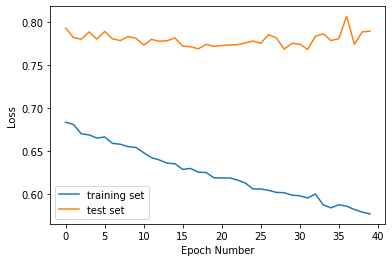

In [ ]:
# grafik loss
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

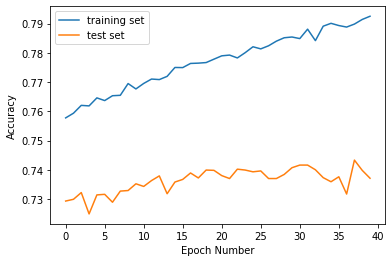

In [ ]:
# Akurasi
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

In [ ]:
model.evaluate(x_test_normalized, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.7897 - accuracy: 0.7371


[0.7897194623947144, 0.7371000051498413]

## Inferensi Data & Hasil

In [ ]:
# melakukan prediksi dari testing
y_predictions = model.predict([x_test_normalized])
y_prediction_classes = [np.argmax(element) for element in y_predictions]

# menampilkan data prediksi 
d = {'test_label': y_test, 'prediction': y_prediction_classes}
pd.DataFrame(data=d)

,test_label,prediction
0,3,3
1,8,8
2,8,8
3,0,0
4,6,6
...,...,...
9995,8,3
9996,3,3
9997,5,5
9998,1,1


Berdasarkan hasil di atas, terlihat beberapa hal yang tidak dikenali. 3 kategori yang paling banyak gagal dikenali secara berturut-turut adalah kucing (cat), burung (bird), anjing (dog). 

Contoh data yang tidak dikenali:

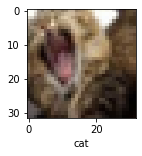

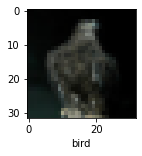

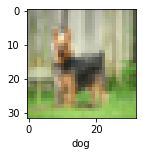

In [ ]:
# contoh cat
plot_sample(x_test, y_test, 53)
# contoh bird
plot_sample(x_test, y_test, 118)
# contoh dog
plot_sample(x_test, y_test, 24)

Sedangkan untuk tiga data yang paling sedikit gagal dikenali adalah katak (frog), automobile, kapal (ship). 

Contoh gambar:

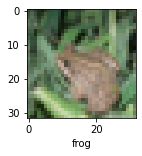

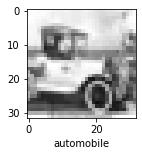

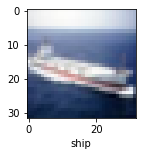

In [ ]:
# contoh katak
plot_sample(x_test, y_test, 4)
# contoh automobile
plot_sample(x_test, y_test, 37)
# contoh kapal
plot_sample(x_test, y_test, 54)